# Medical Insurance Price Prediction using Machine Learning in Python

In the project, we will try to extract some insights from a dataset that contains details about the background of people who is purchasing medical insurance along with what amount of premium is charged to those individuals.
we will apply Machine Learning Regression algorithm using supervised learning to predict Healthcare Insurance costs.

In [35]:
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading data
data=pd.read_csv("D:\ML 5sept2022\project\insurance\insurance.csv")



In [36]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [37]:
#rows x cols

print(data.shape)

(1338, 7)


In [38]:
#check for null values

print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Data Exploration

Dataset consists of 1338 records. Each record contains the below data for specific person.

age – Age of the person
sex – Sex of the person
bmi – Body Mass Index(BMI) of the person
children – Number of children for the person
smoker – Smoking status of the person
region – Region of the person in US
charges – Medical Insurance costs per year for the person

In [39]:
#info 

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


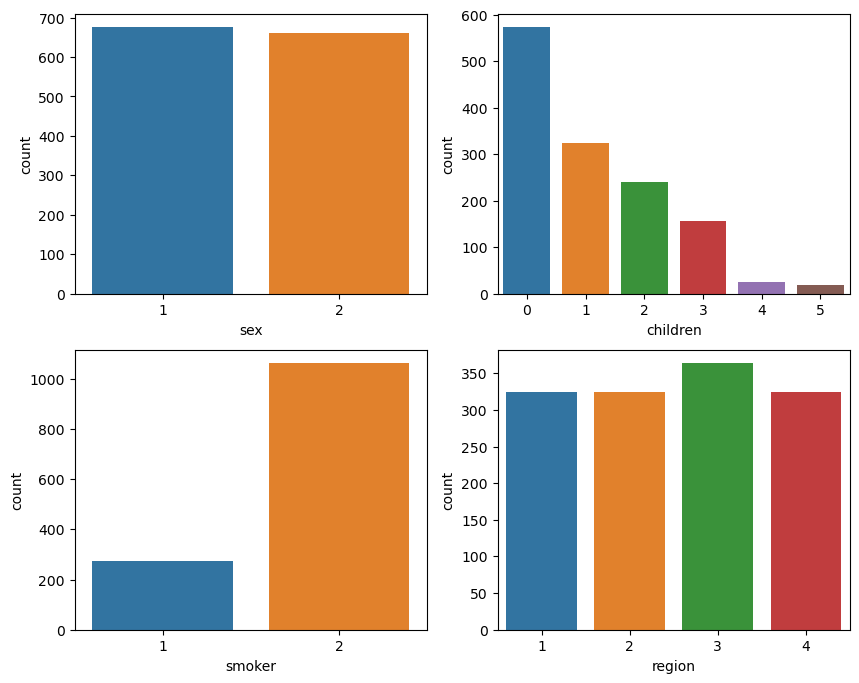

In [66]:
# Univariate Analysis

fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.countplot(x="sex",data=data,ax=ax[0][0])
sns.countplot(x="children",data=data,ax=ax[0][1])
sns.countplot(x="smoker",data=data,ax=ax[1][0])
sns.countplot(x="region",data=data,ax=ax[1][1])
plt.show()


In [59]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [60]:
data['smoker'].value_counts()

2    1064
1     274
Name: smoker, dtype: int64

---> From above figures we can say below

1)Input data contains an even distribution of male and female samples
2)Majority of them are non-smokers with 1064 samples
3)A major sample of input data contains persons with no children with 574.
4)The data is evenly distributed across 4 regions with the region of southeast having slightly more samples.


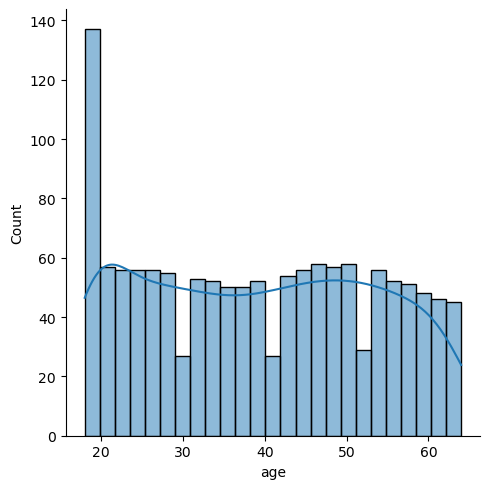

In [41]:
sns.displot(x='age',data=data,bins=25,kde=True)

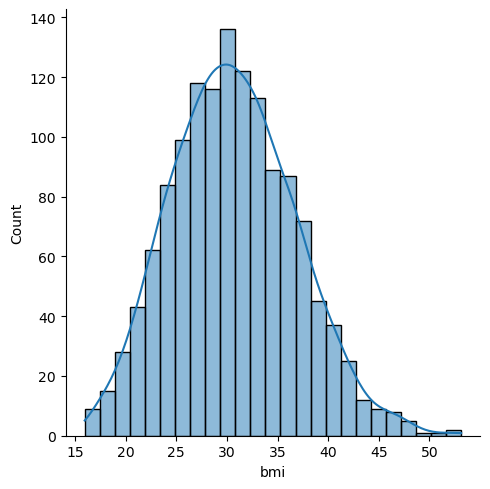

In [61]:
sns.displot(x='bmi',data=data,bins=25,kde=True)

Data in both the age and BMI column approximately follow a Normal distribution which is a good point
with respect to the model’s learning

In [ ]:
# FEATURE ENGINEERING
Now, we have created two extra features to categorise age groups and BMI groups as shown in below functions
to gain some insights about data. 

In [43]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]


In [75]:
data['nbmi']=data['bmi'].apply(bmi_category)
data['nage']=data['age'].apply(age_category)



In [76]:
data.head()

,age,sex,bmi,children,smoker,region,charges,nbmi,nage
0,19,2,27.900,0,1,4,16884.92400,over-weight,10-19
1,18,1,33.770,1,2,3,1725.55230,obese,10-19
2,28,1,33.000,3,2,3,4449.46200,obese,20-29
3,33,1,22.705,0,2,2,21984.47061,normal-weight,30-39
4,32,1,28.880,0,2,2,3866.85520,over-weight,30-39


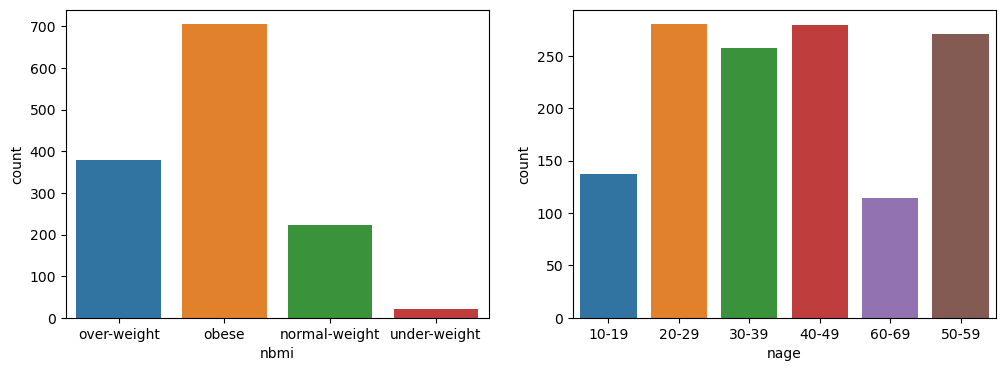

In [80]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.countplot(x='nbmi',data=data,ax=ax[0])
sns.countplot(x='nage',data=data,ax=ax[1])
plt.show()

--> From above two figure we can say below :-
Majority of the samples are in age groups 20-29 and 40- 49.
Majority of the sample fall under the category of obese.


* BIVARIATE ANALYSIS *

Here , we will understand how the charges column is correlated with other feature.

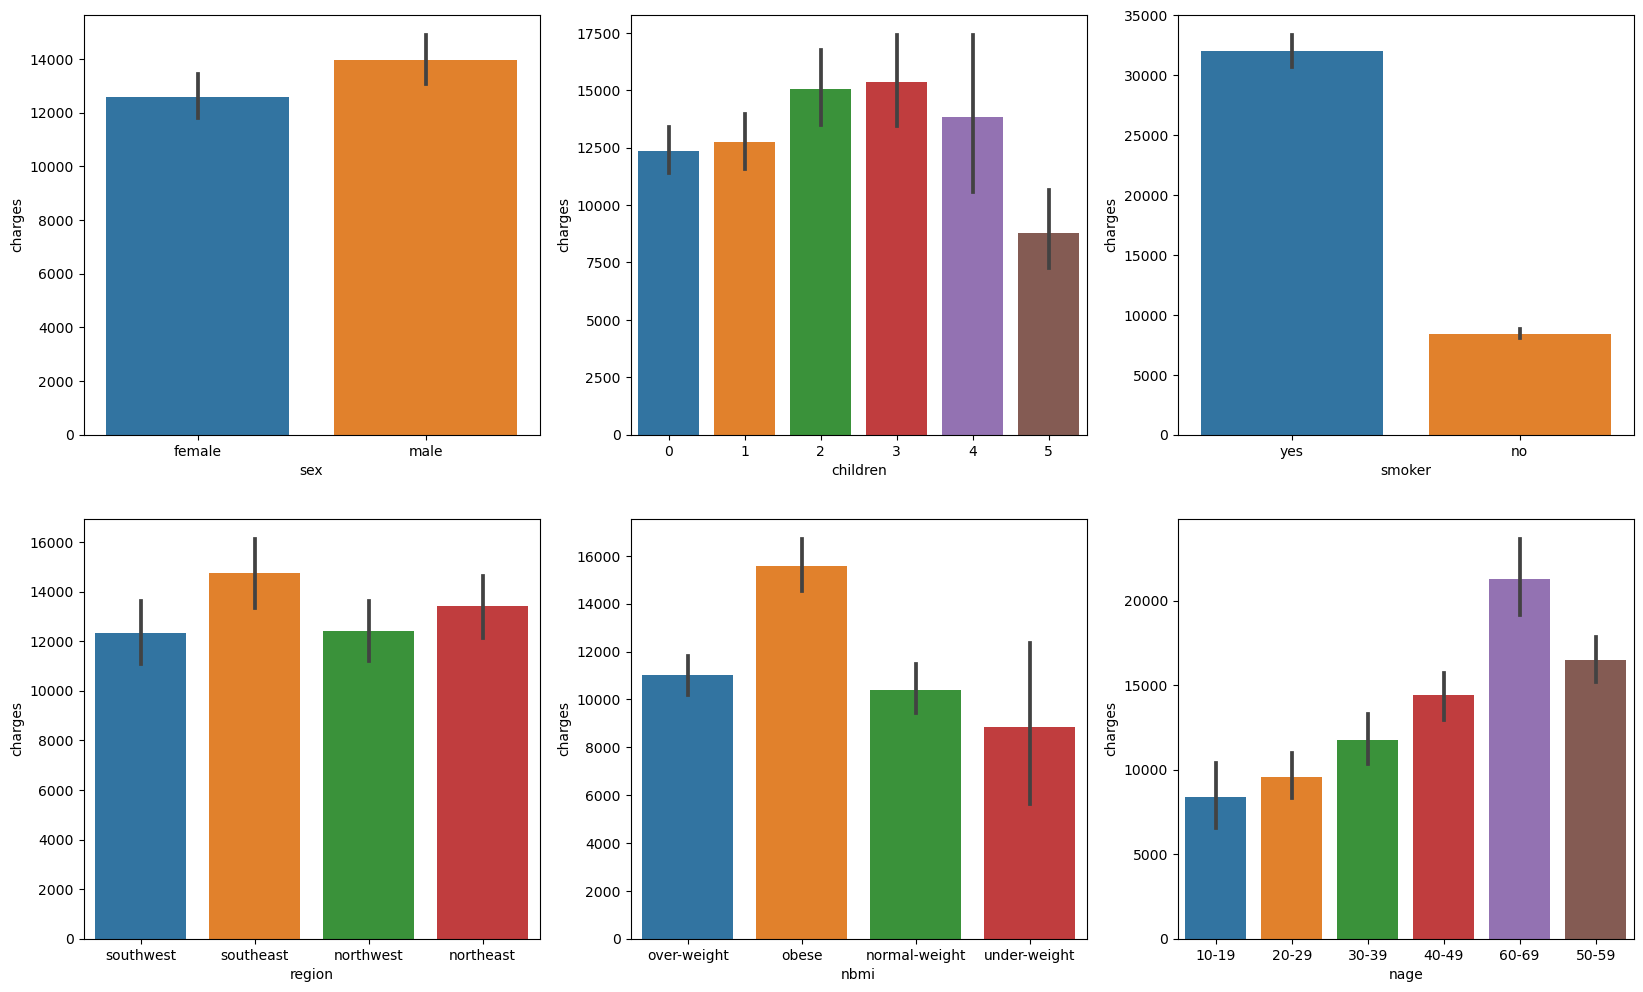

In [45]:


import seaborn as sns
fig,ax=plt.subplots(2,3,figsize=(20,12))
sns.barplot(x='sex',y='charges',data=data,ax=ax[0][0])
sns.barplot(x='children',y='charges',data=data,ax=ax[0][1])
sns.barplot(x='smoker',y='charges',data=data,ax=ax[0][2])
sns.barplot(x='region',y='charges',data=data,ax=ax[1][0])
sns.barplot(x='nbmi',y='charges',data=data,ax=ax[1][1])
sns.barplot(x='nage',y='charges',data=data,ax=ax[1][2])
plt.show()

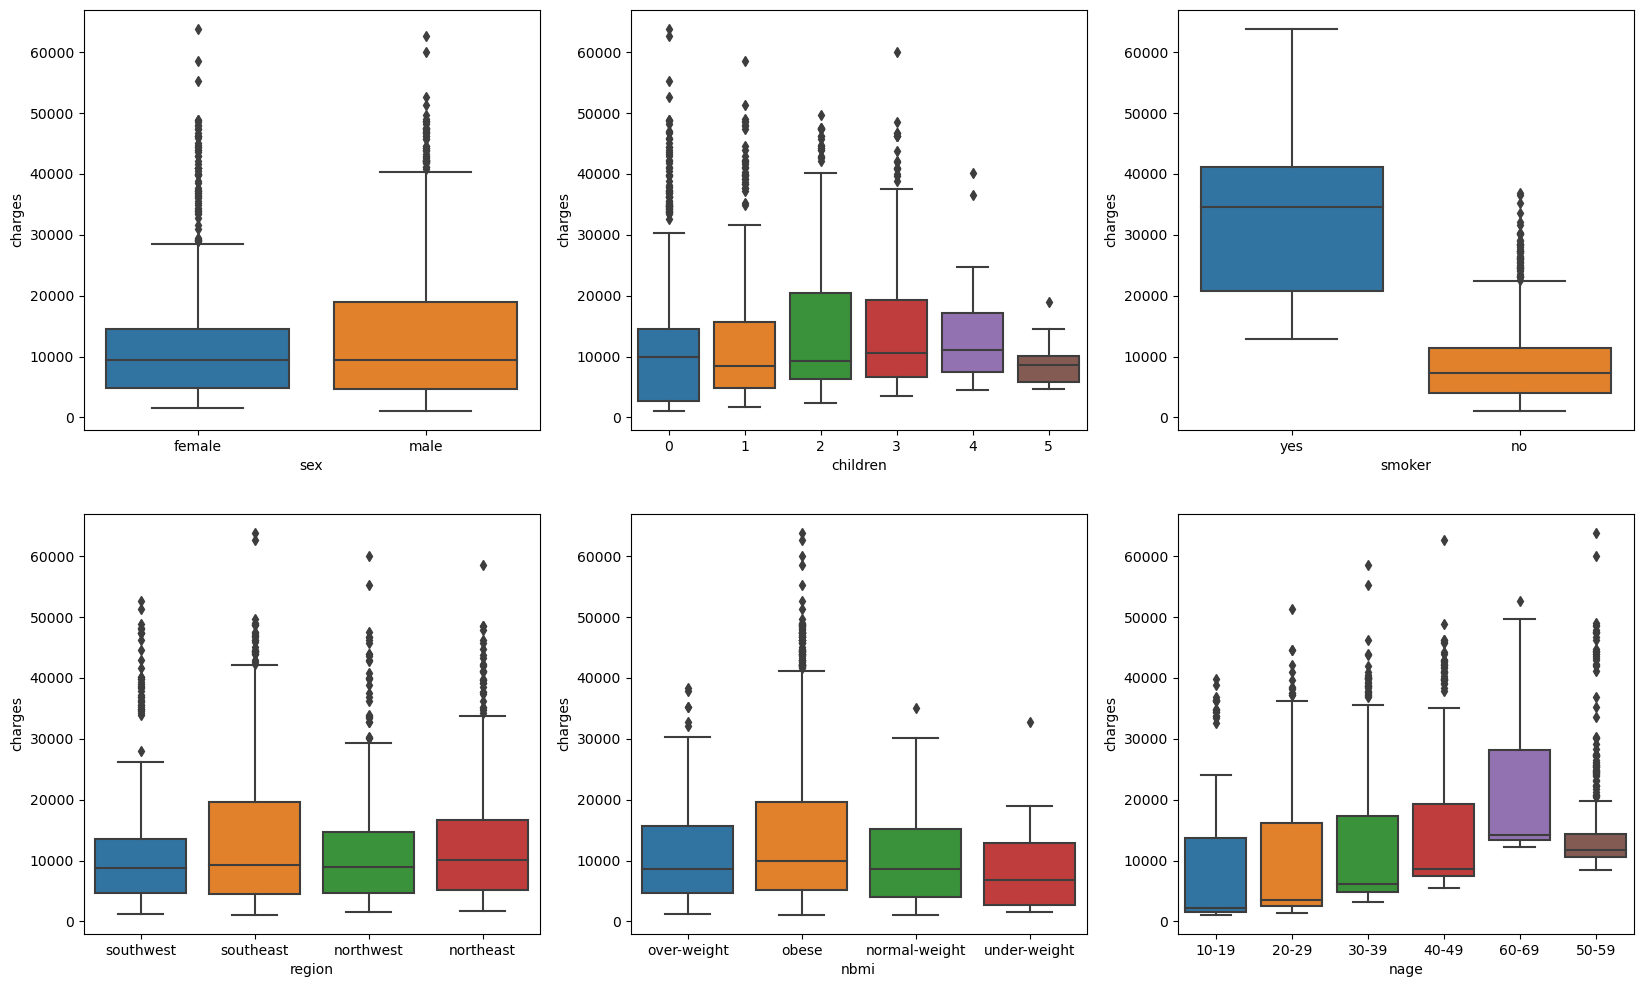

In [46]:
import seaborn as sns
fig,ax=plt.subplots(2,3,figsize=(20,12))
sns.boxplot(x='sex',y='charges',data=data,ax=ax[0][0])
sns.boxplot(x='children',y='charges',data=data,ax=ax[0][1])
sns.boxplot(x='smoker',y='charges',data=data,ax=ax[0][2])
sns.boxplot(x='region',y='charges',data=data,ax=ax[1][0])
sns.boxplot(x='nbmi',y='charges',data=data,ax=ax[1][1])
sns.boxplot(x='nage',y='charges',data=data,ax=ax[1][2])
plt.show()

---> From the above graphs, we can deduce the below facts.

1)Insurance costs are higher among male population
2)Insurance costs are highest among the population of age groups 60-69.
3)Insurance costs increases among the smokers
4)Insurance costs increases among the obese population
5)Insurance costs are higher among the population in southwest region


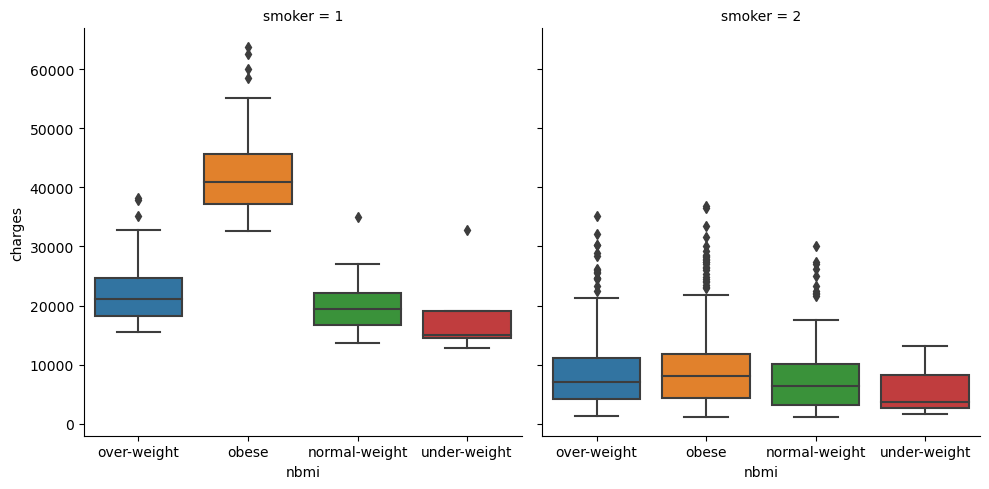

In [85]:
sns.catplot(x='nbmi',y='charges',col='smoker',kind='box',data=data)

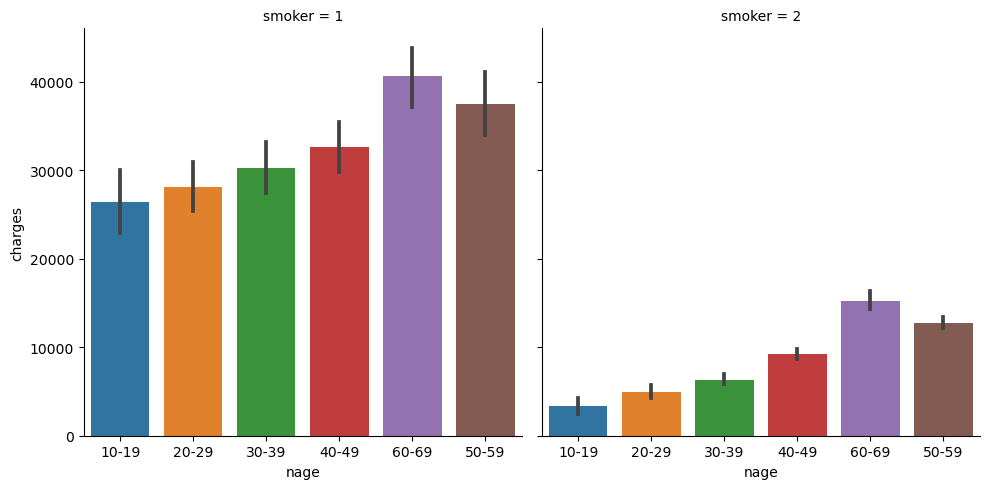

In [88]:
sns.catplot(x='nage',y='charges',col='smoker',kind='bar',data=data)

---> From above two catplots we can derive:
1)If a person is obese and a smoker , insurance cost increases .
2)If a person is smoker and within age group of 60-69 , they incur heavy insurance premium. 

** ENCODING CATEGORICAL FEATURES BELOW **

In [47]:
data=data.replace({"sex":{"male":1,"female":2}})
data=data.replace({"smoker":{"yes":1,"no":2}})
data=data.replace({"region":{"northeast":1,"northwest":2,"southeast":3,"southwest":4}})
data.head()


,age,sex,bmi,children,smoker,region,charges,nbmi,nage
0,19,2,27.900,0,1,4,16884.92400,over-weight,10-19
1,18,1,33.770,1,2,3,1725.55230,obese,10-19
2,28,1,33.000,3,2,3,4449.46200,obese,20-29
3,33,1,22.705,0,2,2,21984.47061,normal-weight,30-39
4,32,1,28.880,0,2,2,3866.85520,over-weight,30-39


In [48]:
data.head()

,age,sex,bmi,children,smoker,region,charges,nbmi,nage
0,19,2,27.900,0,1,4,16884.92400,over-weight,10-19
1,18,1,33.770,1,2,3,1725.55230,obese,10-19
2,28,1,33.000,3,2,3,4449.46200,obese,20-29
3,33,1,22.705,0,2,2,21984.47061,normal-weight,30-39
4,32,1,28.880,0,2,2,3866.85520,over-weight,30-39


In [49]:
# dropping extra features 
data.drop(['nbmi','nage'],axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,4,16884.92400
1,18,1,33.770,1,2,3,1725.55230
2,28,1,33.000,3,2,3,4449.46200
3,33,1,22.705,0,2,2,21984.47061
4,32,1,28.880,0,2,2,3866.85520


In [50]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,1.795217,2.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,1.000000,15.960000,0.000000,1.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,2.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,2.000000,3.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,2.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,2.000000,4.000000,63770.428010


---> From above description :-
1)Mean cost incurred charges is 13270 in U.S
2)Minimum charges incurred by a person is 1121.
3)Maximum charges incurred by a person is 63770.


In [51]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.002181,-0.787251
region,0.002127,-0.004588,0.157566,0.016569,0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.006208,1.000000


<AxesSubplot:>

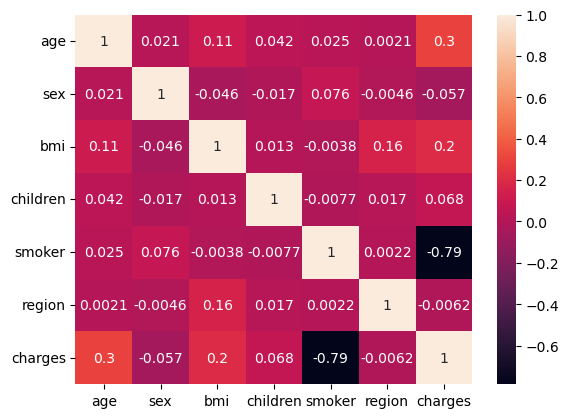

In [52]:
sns.heatmap(data.corr(),annot=True)

 ---> From above correlation matrix we can derive that 
age , bmi , smoker have strong influence on insurance charges.

In [55]:
# craeting features and target

f=data.drop(['charges'],axis=1)
t=data['charges']



In [ ]:
#train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(f,t,test_size=0.2,random_state=11)


In [56]:
#creating model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics
  
rfc = RandomForestRegressor(n_estimators = 10)
lc = LinearRegression()
dc = DecisionTreeRegressor()
ada = AdaBoostRegressor()

for reg in (lc,dc,rfc,ada):
    reg.fit(x_train, y_train)
    print("Accuracy_train of ",reg.__class__.__name__,reg.score(x_train, y_train))
    print("Accuracy_test of ",reg.__class__.__name__,reg.score(x_test,y_test))
    print("--"*50)
    
    

Accuracy_train of  LinearRegression 0.7388805137721672
Accuracy_test of  LinearRegression 0.7993819717035825
----------------------------------------------------------------------------------------------------
Accuracy_train of  DecisionTreeRegressor 0.9988469838286381
Accuracy_test of  DecisionTreeRegressor 0.7455810446453703
----------------------------------------------------------------------------------------------------
Accuracy_train of  RandomForestRegressor 0.9699082371669377
Accuracy_test of  RandomForestRegressor 0.8489497821128777
----------------------------------------------------------------------------------------------------
Accuracy_train of  AdaBoostRegressor 0.8346173922977017
Accuracy_test of  AdaBoostRegressor 0.8452094379707425
----------------------------------------------------------------------------------------------------


In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
mms=MinMaxScaler() #--feature scaling same like PLR , first only transform fetaures 
nf=mms.fit_transform(f)

N=int(len(data)**0.5)
if N%2==0:
	N=N+1
print(N)


model=KNeighborsRegressor(n_neighbors=N,metric="euclidean")
model.fit(nf,t)

print("Accuracy_train",model.score(x_train, y_train))
print("Accuracy_test",model.score(x_test,y_test))
    


37
Accuracy_train -0.037713885959669735
Accuracy_test -0.0821964041865042


C:\Users\parimal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\parimal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


---> CONCLUSION
Out of all models RandomForest Regression is giving good train and test score .
The prediction made by this model is close to real values , so we chose it .
We gathered some insights about data through various graphs which depicts as similar to real life scenario
and understood patterns in the relation between the independent features and the premium charged from the buyers.
